# 图像处理

In [8]:
from functools import reduce

from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

In [9]:
def rand(a=0, b=1):
    return np.random.rand()*(b-a) + a

annotation_line: /home/hjw/data/VOCdevkit/VOC2012/JPEGImages/2008_000008.jpg 53,87,471,420,12 158,44,289,167,14
    convert to line: ['/home/hjw/data/VOCdevkit/VOC2012/JPEGImages/2008_000008.jpg', '53,87,471,420,12', '158,44,289,167,14']
img width:500,height:442
input_shape: (416, 416)
box: [[ 53  87 471 420  12]
 [158  44 289 167  14]]
random: True
new_ar: 1.1867388346754422
scale: 0.5623575572192969
nw:233,nh:196
------src img--------
image.size: (500, 442)


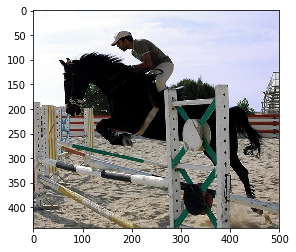

------resize img--------
image.size: (233, 196)


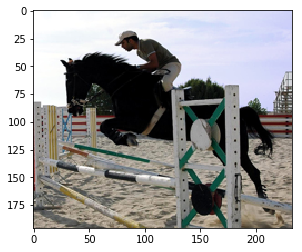

----------new_image-------------
new_iamge.size: (416, 416)


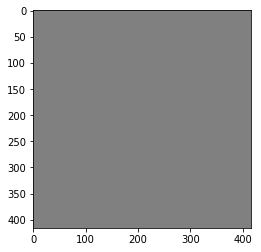

----------new_image paste-------------
new_iamge.size: (416, 416)


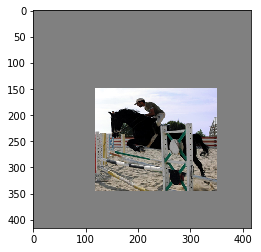

----------image_data-------------
image_data.size: 519168


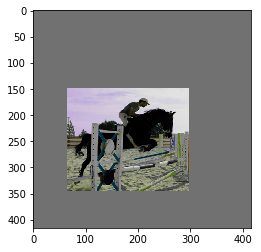

box.shape: (2, 5)
box_data.shape: (20, 5)
box: [[ 78 187 273 335  12]
 [163 168 224 223  14]]
box_data: [[ 78. 187. 273. 335.  12.]
 [163. 168. 224. 223.  14.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


In [31]:
#def get_random_data(annotation_line, input_shape, random=True, max_boxes=20, jitter=.3, hue=.1, sat=1.5, val=1.5, proc_img=True):
annotation_line='/home/hjw/data/VOCdevkit/VOC2012/JPEGImages/2008_000008.jpg 53,87,471,420,12 158,44,289,167,14'
input_shape=(416,416)
random=True  #随机化，达到增强数据
max_boxes=20
jitter=.3 #抖动系数
hue=.1
sat=1.5
val=1.5
proc_img=True
'''random preprocessing for real-time data augmentation'''
'''
@param annotation_line 一个训练样本,形如：img_file 6,1,314,262,19 40,97,121,411,4 137,36,169,109,14 180,36,216,104,14 96,39,123,103,14
'''
line = annotation_line.split() #=>['img_file', '6,1,314,262,19', '40,97,121,411,4', '137,36,169,109,14', '180,36,216,104,14', '96,39,123,103,14']
image = Image.open(line[0])    #=>img_file
iw, ih = image.size            #=>(486,500)尺寸大小不固定
h, w = input_shape             #=>(416,416)
box = np.array([np.array(list(map(int,box.split(',')))) for box in line[1:]]) #=>分离bounding box =>[[6,1,314,262,19],[40,97,121,411,4],[137,36,169,109,14],[180,36,216,104,14],[96,39,123,103,14]]
print('annotation_line:',annotation_line)
print('    convert to line:',line)
print('img width:%d,height:%d'%(iw,ih))
print('input_shape:',input_shape)
print('box:',box)
print('random:',random)
if not random:
    # resize image
    scale = min(w/iw, h/ih) #取较小缩放比例
    nw = int(iw*scale)      #以较小缩放比例重设原图像宽度
    nh = int(ih*scale)      #以较小缩放比例重设原图像高度
    dx = (w-nw)//2          #左右边隙
    dy = (h-nh)//2          #上下边隙   
    image_data=0
    if proc_img:
        image = image.resize((nw,nh), Image.BICUBIC)
        new_image = Image.new('RGB', (w,h), (128,128,128))
        new_image.paste(image, (dx, dy))
        image_data = np.array(new_image)/255. #归一化处理

    # correct boxes
    box_data = np.zeros((max_boxes,5))
    if len(box)>0:
        np.random.shuffle(box)
        if len(box)>max_boxes: box = box[:max_boxes] #最多处理20个box
        box[:, [0,2]] = box[:, [0,2]]*scale + dx     #等比例缩放偏移处理
        box[:, [1,3]] = box[:, [1,3]]*scale + dy     #等比例缩放偏移处理
        box_data[:len(box)] = box

    #return image_data, box_data
else:
    # resize image
    new_ar = w/h * rand(1-jitter,1+jitter)/rand(1-jitter,1+jitter)
    scale = rand(.25, 2)
    if new_ar < 1:
        nh = int(scale*h)
        nw = int(nh*new_ar)
    else:
        nw = int(scale*w)
        nh = int(nw/new_ar)
    print('new_ar:',new_ar)
    print('scale:',scale)
    print('nw:%d,nh:%d'%(nw,nh))
    print('------src img--------')
    print('image.size:',image.size)
    plt.imshow(image)
    plt.show()    
    image = image.resize((nw,nh), Image.BICUBIC)
    print('------resize img--------')
    print('image.size:',image.size)
    plt.imshow(image)
    plt.show()        

    # place image
    dx = int(rand(0, w-nw)) #水平偏移
    dy = int(rand(0, h-nh)) #垂直偏移
    new_image = Image.new('RGB', (w,h), (128,128,128))
    print('----------new_image-------------')
    print('new_iamge.size:',new_image.size)
    plt.imshow(new_image)
    plt.show()
    new_image.paste(image, (dx, dy))
    print('----------new_image paste-------------')
    print('new_iamge.size:',new_image.size)
    plt.imshow(new_image)    
    plt.show()
    image = new_image

    # flip image or not
    flip = rand()<.5 #翻转
    if flip: image = image.transpose(Image.FLIP_LEFT_RIGHT)

    # distort image
    hue = rand(-hue, hue)
    sat = rand(1, sat) if rand()<.5 else 1/rand(1, sat)
    val = rand(1, val) if rand()<.5 else 1/rand(1, val)
    x = rgb_to_hsv(np.array(image)/255.)
    x[..., 0] += hue
    x[..., 0][x[..., 0]>1] -= 1
    x[..., 0][x[..., 0]<0] += 1
    x[..., 1] *= sat
    x[..., 2] *= val
    x[x>1] = 1
    x[x<0] = 0
    image_data = hsv_to_rgb(x) # numpy array, 0 to 1
    print('----------image_data-------------')
    print('image_data.size:',image_data.size)
    plt.imshow(image_data)
    plt.show()
    # correct boxes
    box_data = np.zeros((max_boxes,5))
    if len(box)>0:
        np.random.shuffle(box)
        box[:, [0,2]] = box[:, [0,2]]*nw/iw + dx
        box[:, [1,3]] = box[:, [1,3]]*nh/ih + dy
        if flip: box[:, [0,2]] = w - box[:, [2,0]]
        box[:, 0:2][box[:, 0:2]<0] = 0
        box[:, 2][box[:, 2]>w] = w
        box[:, 3][box[:, 3]>h] = h
        box_w = box[:, 2] - box[:, 0]
        box_h = box[:, 3] - box[:, 1]
        box = box[np.logical_and(box_w>1, box_h>1)] # discard invalid box
        if len(box)>max_boxes: box = box[:max_boxes]
        box_data[:len(box)] = box
    print('box.shape:',box.shape)
    print('box_data.shape:',box_data.shape)
    print('box:',box)
    print('box_data:',box_data)
    #return image_data, box_data    
